# NMLO CONTEST 2 - NEURAL NETWORKS

#### Description
In this competition, you have to predict the type of clothing based on an image.

The clothing labels are: t-shirt/top (0), trouser (1), pullover (2), dress (3), coat (4), sandal (5), shirt (6), sneaker (7), bag (8), ankle boot (9).

Data was taken from zalandoresearch.

LINK: https://www.kaggle.com/competitions/nmlo-contest-2

## IMPORT LIBRARIES AND DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bootcamp batch9/NN_fashion_mnist/train.csv')
data

,id,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,241,204,0,0,1,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,0,...,2,0,0,160,161,126,0,0,0,0
4,4,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,0,0,0,0,0,0,0,0,0,...,67,37,0,0,0,0,0,0,0,0
59997,59997,2,0,0,0,0,1,0,1,1,...,0,127,181,112,90,61,0,0,0,0
59998,59998,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.drop(columns='id', inplace=True)
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,133,...,241,204,0,0,1,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,2,0,0,160,161,126,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,32,...,67,37,0,0,0,0,0,0,0,0
59997,2,0,0,0,0,1,0,1,1,4,...,0,127,181,112,90,61,0,0,0,0
59998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


REMARKS: The data consists of 60000 instances of clothing with 784 pixels, each instances have id number and label number. But we dropped the id number because it's a unique value for naming and would not be useful for this NN modelling. Furthermore, We'll reshape the 784 values into a 28x28 image so the neural network can understand and exploit the spatial (image-like) structure of the data.

## DATA PREPROCESSING

In [ ]:
row = data.loc[(data['label'] == 0), :]
row

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,133,...,241,204,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,2,2,...,135,136,157,163,0,0,1,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,0
22,0,0,0,1,0,0,0,0,0,77,...,123,132,115,0,0,1,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,91,26,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59933,0,0,0,0,1,4,0,0,65,120,...,116,86,34,0,0,0,1,0,0,0
59940,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59955,0,0,0,1,0,1,2,0,0,0,...,84,84,93,1,0,1,0,0,0,0
59982,0,0,0,1,0,0,0,0,0,0,...,136,95,67,15,0,0,0,1,0,0


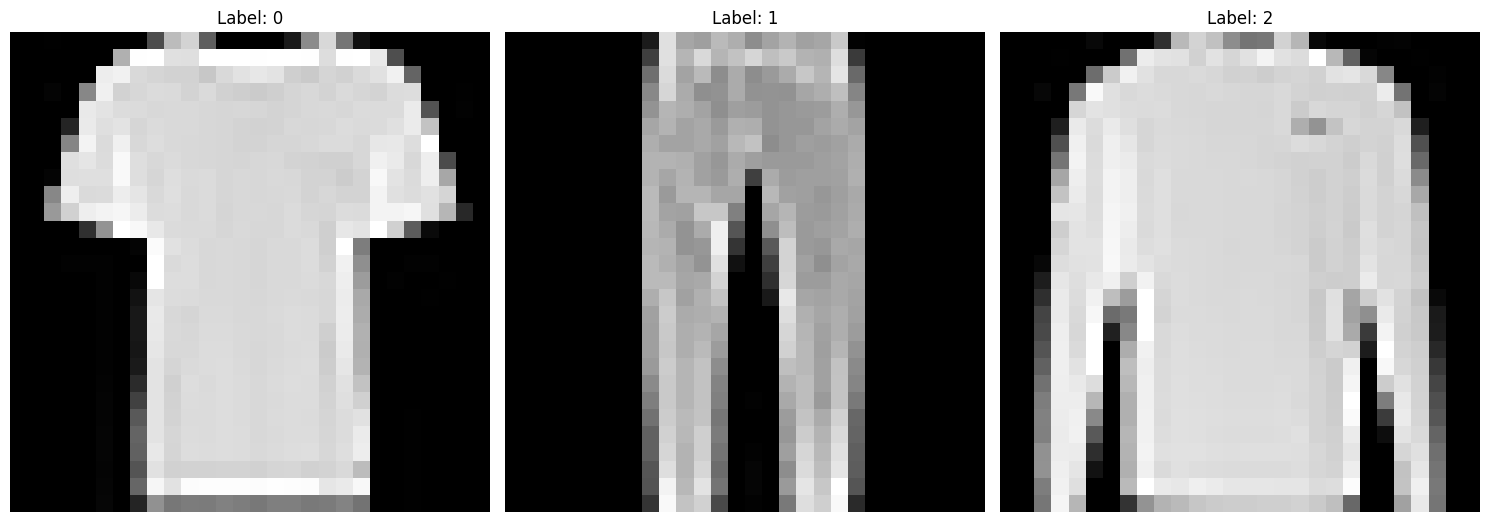

In [ ]:
# selected items 0 -> row 0, 1 -> row 67, 2 -> row 51
# Select a row (e.g., index 0)
row0 = data.iloc[22]
row1 = data.iloc[67]
row2 = data.iloc[51]

# Extract the label
label0 = row0['label']
label1 = row1['label']
label2 = row2['label']

# Extract pixel values and reshape to 28x28
pixels0 = row0.drop('label').values.astype('uint8').reshape((28, 28))
pixels1 = row1.drop('label').values.astype('uint8').reshape((28, 28))
pixels2 = row2.drop('label').values.astype('uint8').reshape((28, 28))

# Display the image
plt.figure(figsize=(15, 8))

plt.subplot(131)
plt.imshow(pixels0, cmap='gray')
plt.title(f"Label: {label0}")
plt.axis('off')

plt.subplot(132)
plt.imshow(pixels1, cmap='gray')
plt.title(f"Label: {label1}")
plt.axis('off')

plt.subplot(133)
plt.imshow(pixels2, cmap='gray')
plt.title(f"Label: {label2}")
plt.axis('off')

plt.tight_layout()
plt.show()

REMARKS: We have reshaped the pixel into 28x28, and just for some quick visualization, I have plotted 3 images based on reshapped pixels. The pictures are centered and symetrical which reduce the pattern complexity for the Neural Networks to learn. We'll proceed to split the main data into 85% for training and 15% for testing. And among 85% of the train data, we take 17.7% for validation data in Neural Network.

In [ ]:
datrain, datest = train_test_split(data, test_size=0.15, random_state=42)

datrain_valid = datrain['label']
datest_valid = datest['label']
datrain.drop(columns='label', inplace=True)

x_train, x_valid, y_train, y_valid = train_test_split(datrain, datrain_valid, test_size=0.1765, random_state=42)

In [ ]:
x_train = x_train / 255.0
x_train = x_train.values.astype(np.float32)
x_train = x_train.reshape(-1, 28, 28)

x_valid = x_valid / 255.0
x_valid = x_valid.values.astype(np.float32)
x_valid = x_valid.reshape(-1, 28, 28)
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
print(x_train.shape)
print(x_valid.shape)

(41998, 28, 28)
(9002, 28, 28)


## NEURAL NETWORK MODELLING

First we wil model the neural network with 1 input layer to receive data in 28x28 shape, followed by 2 Dense layer (300 nodes for the first and 100 for the second) and final output layer with 10 output nodes for classifying. The Neural Nets will be optimized with Adam methods.

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7699 - loss: 0.6527 - val_accuracy: 0.8536 - val_loss: 0.4138
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8578 - loss: 0.3894 - val_accuracy: 0.8645 - val_loss: 0.3759
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8707 - loss: 0.3517 - val_accuracy: 0.8747 - val_loss: 0.3546
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8824 - loss: 0.3192 - val_accuracy: 0.8810 - val_loss: 0.3431
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8885 - loss: 0.2986 - val_accuracy: 0.8715 - val_loss: 0.3593
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8949 - loss: 0.2848 - val_accuracy: 0.8862 - val_loss: 0.3355
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8994 - loss: 0.2713 - val_accuracy: 0.8872 - val_loss: 0.3255
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9019 - loss: 0.2541 - 

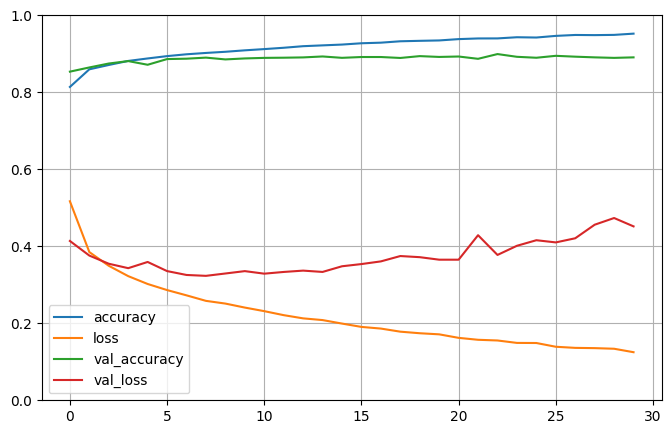

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
x_test = datest.drop(columns='label')
x_test = x_test / 255.0
x_test = x_test.values.astype(np.float32)
x_test = x_test.reshape(-1, 28, 28)

y_test = datest_valid

pred_val = model.evaluate(x_test, y_test)
pred_val

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8970 - loss: 0.3912


[0.402145117521286, 0.8964444398880005]

At this first run we can see the categorical accuracy is quite good enough with 89.7% accuracy. However, if we see the GCA graphic especialy the log-loss metrics, we can see diverging gap between validation data and training data which is a classic sign of overfitting. Let's fix that by using regularization technique called Dropout. Basically we put Dropout layers and shutdown the 'inactivated' neurons (small weight), and make the nets focus learning on the other neurons that still have errors/weight. In addition to that, let's change the optimizer to Nesterov method to further alleviate this overfitting.

In [ ]:
# optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
optimizer =  keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=175,
                    validation_data=(x_valid, y_valid))

Epoch 1/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5275 - loss: 1.3289 - val_accuracy: 0.7784 - val_loss: 0.6126
Epoch 2/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7472 - loss: 0.6967 - val_accuracy: 0.8118 - val_loss: 0.5294
Epoch 3/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7805 - loss: 0.6115 - val_accuracy: 0.8218 - val_loss: 0.4997
Epoch 4/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7930 - loss: 0.5711 - val_accuracy: 0.8365 - val_loss: 0.4643
Epoch 5/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7977 - loss: 0.5555 - val_accuracy: 0.8401 - val_loss: 0.4517
Epoch 6/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8121 - loss: 0.5221 - val_accuracy: 0.8438 - val_loss: 0.4372
Epoch 7/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8161 - loss: 0.5032 - val_accuracy: 0.8467 - val_loss: 0.4314
Epoch 8/175
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8230 - loss: 0

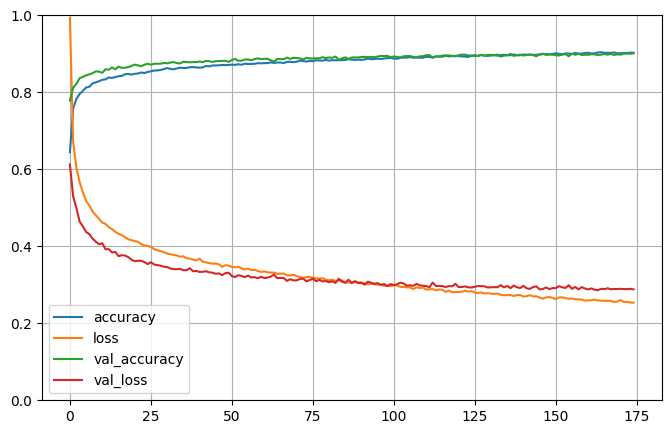

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
x_test = datest.drop(columns='label')
x_test = x_test / 255.0
x_test = x_test.values.astype(np.float32)
x_test = x_test.reshape(-1, 28, 28)

y_test = datest_valid

pred_val = model.evaluate(x_test, y_test)
pred_val

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8984 - loss: 0.2696


[0.2665739059448242, 0.9010000228881836]

COMMENTS: With the Neural Network that has architecture of 1 input layer,followed by 2 Dense layer and final output layer with the addition of Dropout layers to reduce the overfitting, we can achive 89.8% prediction accuracy of this fashion dataset. Combined with Nesterov optimizer we can reduce the overfitting even more without lowering the accuracy score.